<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression

#### Learning Objectives
- Define data modeling and simple linear regression.
- Build a linear regression model using a data set that meets the linearity assumption using the scikit-learn library.
- Understand and identify multicollinearity in a multiple regression.


## 1. What is linear regression?

Linear regression is a way of modelling some depdendent variable $y$ as a linear combination of one or more independent variables $x$.

We are often taught the formula for a straight line is: $y = mx + b$.

This can alternatively be written as: $$y = \beta_{0} + \beta_{1} x$$

### 1.1 What are the independent and dependent variables in this formula?

### 1.2 What's the difference between regression and classification?

In regression tasks, the **dependent** variable is continuous. In classification tasks, the **dependent** variable is categorical. 

An example of a regression problem could be: Predicting Google's share price.

An example of a classification task could be: Predicting a person's favourite fruit.

It's important to note that features in both classification and regression tasks can be a combination of continuous and categorical (we often need to transform categorical features into continuous ones or vice versa depending on the type of model we're using). 

### Exercise

Are the following examples of regression or classification? Remember, when we're deciding whether something is a classification task or a regression task, the **only** thing that matters is whether the **dependent** variable is continuous or categorical. 

(a) Predicting someone's weight based on their favourite fruit
(b) Predicting someone's eye colour based on their weight
(c) Predicting which party will have a majority 
(d) Predicting a party's vote share

### 1.3 What do we mean by linear?

An equation is **linear** if the highest degree of any of the the independent variables (i.e. $x$) is 1. If there's a term containing $x^2$ for example, the equation is no longer linear because the independent variable is being raised to a power higher than 1. 

https://en.wikipedia.org/wiki/Degree_of_a_polynomial

### 1.4 What does 'training' or 'fitting' a linear regression model mean? 

Linear regression is our first example of supervised learning. In supervised learning tasks, we:

1. Obtain a dataset that consists of lots of data points, where each point consists of:

    * A value for our label/response/target/dependent variable $y$
    * Corresponding values for our features/predictors/independent variables $x$
    
    You can think of a single 'data point' or 'observation' as corresponding to a single row in a Pandas dataframe
    
2. Split the dataset into a training set that we'll use to fit or train our model, and a testing set that we'll use to evaluate our model's accuracy. A typical split is 80% of our data will be used for training, and 20% for testing. 

3. Train or fit our model. This will be different for different models. 

In linear regression, training is the process of finding the linear equation that best fits our data.

In other words, we're finding the $\beta$ values or **model coefficients** that give us the line of best fit:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are trying to find the line (mathematically) that minimizes the **sum of squared residuals** (or "sum of squared errors").
- Once we've learned these coefficients, we can use the model to predict the values for $y$, the dependent variable (or 'response') for new data points where we only have access to $x$, the features.

![Estimating coefficients](./assets/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

Evaluation metrics for classification problems, such as accuracy, are not useful for regression problems. We need evaluation metrics designed for comparing continuous values.

Here are three common evaluation metrics for regression problems:

**Mean absolute error (MAE)** is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean squared error (MSE)** is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root mean squared error (RMSE)** is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Let's compare these metrics:

- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.    Also, MSE is continuous and differentiable, making it easier to use than MAE for optimization.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

### 1.5 Why use linear regression?

Advantages of linear regression:

- Simple to explain.
- Highly interpretable.
- Model training and prediction are fast.
- No tuning is required (excluding regularization).
- Features don't need scaling.
- Can perform well with a small number of observations.
- Well understood.

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response.
- Performance is (generally) not competitive with the best supervised learning methods due to high bias.
- Can't automatically learn feature interactions.


## 2. Let's try it out

Let's work through a simple example 'by hand' to understand how linear regression works. 

### 2.1 Read in some dummy data

Imagine we have a data frame that describes the vote share of the Labour Party vs the percentage of 18-25 year olds in a particular constituency. (Note: this is dummy data!)

In [7]:
import pandas as pd
import numpy as np

votes_df = pd.DataFrame({'vote_share':[44, 20, 67, 12, 80],'young_population':[24, 8, 28, 7, 35]})
votes_df.head()

,vote_share,young_population
0,44,24
1,20,8
2,67,28
3,12,7
4,80,35


### 2.2 Write down the general form of equation we're trying to fit to our data

Using the variable names 'vote_share' and 'young_population', write down the general form of linear equation we're trying to fit to our data.

What are the values we're trying to find? 

### 2.3 Use scikit-learn to fit our model and make predictions

This bit is super simple with scikit-learn! We import scikit-learn, initialise the linear regression model, and then fit it to our data:

**Step 1:** Import the class you plan to use from scikit-learn

In [3]:
from sklearn.linear_model import LinearRegression # import

**Step 2:** Initialise the model

* We've created an object that "knows" how to do linear regression, and is just waiting for data.
* The ame of the object does not matter.
* All parameters not specified are set to their defaults.
* We can specify tuning parameters (aka "hyperparameters") during this step. 


In [4]:
linreg = LinearRegression() # initialise 

**Step 3:** Fit the model with data (aka "model training").

- Model is "learning" the relationship between X and y in our "training data."
- Process through which learning occurs varies by model.
- Occurs in-place.

Note that 'X' and 'y' correspond to the correct columns in our 'votes' dataframe.

In [8]:
y = votes_df['vote_share']
X = np.array(votes_df['young_population']).reshape(-1, 1)

linreg.fit(X, y) # fit 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Hooray! `linreg` is now a trained model!

**Step 4:** Inspect our trained model.

Now we've fitted our linear regression model, we can look at the coefficients it's learned and evaluate how well the model fits our data using the **sum of squared errors** metric we defined earlier

In [9]:
coefficients = linreg.coef_
print(coefficients)

[ 2.3117304]


In [10]:
intercept = linreg.intercept_
print(intercept)


-2.55930006481


Now we know what the learned coefficient and intercept of our model is, let's write down a formula describing the learned relationship between vote share and young population:

In [11]:
y_pred = coefficients[0]*X + intercept

We can also plot the line of best fit against our data

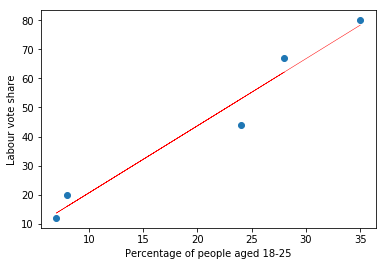

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.plot(X,y_pred,'r',linewidth=0.5)
plt.xlabel('Percentage of people aged 18-25')
plt.ylabel('Labour vote share')
plt.show()

Interpreting the intercept ($\beta_0$):

- It is the value of $y$ when all independent variables are 0.
- Here, it is the estimated vote share when there are no 18-25 year olds in a constituency.
- **Note:** It does not always make sense to interpret the intercept; why? 

Interpreting the "youth" coefficient ($\beta_1$):

- **Interpretation:** An increase of 1% in youth population in a constituency is _associated with_ increasing the Labour vote share by $\beta_1$
- In this case, an increase of 1% in youth population in a constituency is _associated with_ increasing the Labour vote share by 2.3%
- This is not a statement of causation.
- $\beta_1$ would be **negative** if an increase in youth population was associated with a **decrease** in Labour vote share.
- $\beta_1$ would be **zero** if youth population is not at all associated with Labour vote share.

**Step 5:** Evaluate our model

Exactly how well does our formula, or our 'line of best fit' fit our data?

Use our formula for **mean squared error** and **root mean squared error** to calculate this by hand. What's `y_pred` and `y_actual` in this case?


In [14]:
sum_sq_residuals = 0

for i in range(0,len(y)):
    print(i)
    sum_sq_residuals += (y[i]-y_pred[i])**2
    
print(sum_sq_residuals)

0
1
2
3
4
[ 124.82307194]


In [15]:
sum_sq_residuals/len(y)

array([ 24.96461439])

In [16]:
np.sqrt(sum_sq_residuals/len(y))

array([ 4.99646019])

We can also calculate the **mean squared error** and **root mean squared error** using scikit-learn

In [17]:
from sklearn.metrics import mean_squared_error

y_actual = y
y_pred = y_pred

mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Mean squared error: 24.964614
Root mean squared error: 4.996460


**Step 6:** Predict the response for a new data point

This is the exciting bit! New observations are called "out-of-sample" data. Our model uses the information it learned during the model training process.

Let's ask the model to make two predictions:

* One in a constituency where the youth population is 17%
* Another where the youth population is 20%

To do this, our feature matrix is always a 2-D array where each row is a list of features. Since we only have a single feature, the youth population, each row will contain only a single value.


In [18]:
X_new = [[17], [20]]
linreg.predict(X_new)


array([ 36.74011666,  43.67530784])

What we just predicted using our model is:

* In a constituency where the proportion of 18-25 year olds is 17%, the Labour vote share will be around 37%
* In a constituency where the proportion of 18-25 year olds is 20%, the Labour vote share will be around 43%


## 2. Linear regression with multiple independent variables

Performing linear regression with one independent variable is very straightforward. But most interesting, real life problems will involve many independent variables, not just one! The formula above can be generalised to $n$ independent variables as follows:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$

- $y$ is the response, or dependent variable
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature).
- $\beta_n$ is the coefficient for $x_n$ (the nth feature).

A practical example of this sort of model applied to our vote share example might be:

$vote\:share = \beta_0 + \beta_1*young\:population + \beta_2*home\:ownership + \beta_3*unemployment\:rate$

## 3. Simple linear regression with the 2016 US Presidential Election dataset

Now let's try this method out with a much bigger dataset! Read in the dataset, which describes the Trump vote share for every county in the US for the 2016 US Presidential elections, together with demographic information for each county. 

We'll be using this dataset to investigate which demographic factors are the biggest drivers of Trump support, and ultimately predict vote share in new, out-of-sample counties.

### 3.1 Read in the training data

This consists of data for 80% of the counties in the US. The remaining 20% of counties will be our testing dataset; we won't read that in yet!


In [19]:
training_data = pd.read_csv('./data/us_presidential_votes_clean.csv')
training_data.head()

,Trump,population_2010,persons_under_5_years_percent_2014,persons_under_18_years_percent_2014,age65plus,female_persons_percent_2014,White,Black,american_indian_and_alaska_native_alone_percent_2014,asian_alone_percent_2014,...,hispanicowned_firms_percent_2007,womenowned_firms_percent_2007,manufacturers_shipments_2007_1000,merchant_wholesaler_sales_2007_1000,retail_sales_2007_1000,retail_sales_per_capita_2007,accommodation_and_food_services_sales_2007_1000,building_permits_2014,land_area_in_square_miles_2010,Density
0,0.734358,54571,6.0,25.2,13.8,51.4,0.779,0.187,0.5,1.1,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
1,0.773515,182265,5.6,22.2,18.7,51.2,0.871,0.096,0.7,0.9,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
2,0.522714,27457,5.7,21.2,16.5,46.6,0.502,0.476,0.6,0.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0
3,0.769662,22915,5.3,21.0,14.8,45.9,0.763,0.221,0.4,0.2,...,0.0,0.0,0,0,124707,5804,10757,19,622.58,36.8
4,0.898519,57322,6.1,23.6,17.0,50.5,0.960,0.018,0.6,0.3,...,0.0,23.2,341544,0,319700,5622,20941,3,644.78,88.9


Inspect the data dictionary, which is in the `data` folder under the filename `us_presidential_votes_dictionary.csv`

Familiarise yourself with the contents of the file.

* What does each row correspond to?

* What's the column name of the indepependent variable?

* What are the column names of our dependent variables?

### 3.2 Inspect the data

Use `sns.pairplot`, `sns.heatmap`, `describe` and `corr` to:

(a) Create a pairplot of all different pairings of variables in our dataset (this might take a while depending on how fast your laptop is!)
(b) Generate a correlation matrix
(c) Visualise the correlation matrix with a heatmap

Then, by visual inspection, discuss the following questions on your tables:

(a) Which variables look like they're most strongly associated or correlated with Trump support?

(b) Do the associations make intuitive sense? If not, why not? 

(c) Do some of the associations look like they describe causal relationships? Which ones? 



In [ ]:
training_data.describe()

In [ ]:
sns.pairplot(training_data)

In [ ]:
training_data.corr()

In [ ]:
sns.heatmap(training_data.corr())

### 3.3 Fit a linear regression model with just ONE independent variable 

Using your exploratory data analysis above, pick **one** independent variable that you think is strongly associated with Trump support. Enter the column name of that feature here, as a string:

In [ ]:
feature_name = 'White'

Enter the column name of our dependent variable here, as a string:

In [ ]:
response_name = 'Trump'

Initialise a linear regression model using scikit-learn

In [ ]:
trump_model = LinearRegression() # initialise 

X_train = np.array(training_data[feature_name]).reshape(-1, 1)
y_train = training_data[response_name]

trump_model.fit(X_train,y_train)

Inspect the coefficient and intercept of the learned model, and plot the actual values of your dependent vs independent variable against the line of best fit, as in our dummy example above. 

In [ ]:
coefficients = trump_model.coef_

In [ ]:
intercept = trump_model.intercept_

Using these values compute y_pred, which is the line of best fit for our data.  

In [ ]:
y_model = coefficients[0]*X_train + intercept

Plot our data against the line of best fit- don't forget to add labels for the x and y axes

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train,alpha=0.3)
plt.plot(X_train,y_model,'r',linewidth=0.5)
plt.xlabel('')
plt.ylabel('')
plt.show()

Now calculate the mean squared error of our trained model.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_train, y_model)
rmse = np.sqrt(mse)

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

On your table, discuss which feature you chose and why, and compare root mean squared errors. 

### 3.4 Test our simple linear model on out of sample data

Now we've trained our simple linear model, we can read in our testing data. 

In [ ]:
testing_data = pd.read_csv('./data/us_presidential_votes_test.csv')
testing_data.head()

We can use our model to predict Trump vote share in these new counties, based on our chosen independent variable for those counties.

In [ ]:
y_test = testing_data['Trump']
X_test = np.array(testing_data[feature_name]).reshape(-1, 1)

y_pred = trump_model.predict(X_test)

We can plot our test data against our line of best fit

In [ ]:
plt.scatter(X_test,y_test,alpha=0.3)
plt.plot(X_test,y_pred,'r',linewidth=0.5)
plt.xlabel('')
plt.ylabel('')
plt.show()

We can also evaluate the accuracy of our model on unseen data, using root mean squared error

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

## 4. Multiple linear regression

Now let's build a more complex model, using **all** available features to predict the strength of the Trump vote. Fill in the cells below to do this. 


Start by intialising a linear regression model; call it `trump_model_multi`

In [ ]:
trump_model_multi = LinearRegression()

Now define the features and response for our training data

In [ ]:
X_train = np.array(training_data.drop(columns='Trump')) # extract an array of features from our election_df dataframe
y_train = training_data['Trump'] # extract the corresponding values of the Trump vote 


Now fit the model to this data

In [ ]:
trump_model_multi.fit(X_train,y_train)

Inspect the coefficients and intercept

In [ ]:
trump_model_multi.coef_

In [ ]:
trump_model_multi.intercept_

Use this model to predict Trump support in our out-of-sample counties

In [ ]:
X_test = np.array(testing_data.drop(columns='Trump'))
y_test = testing_data['Trump']

y_pred = trump_model_multi.predict(X_test)

Compute the root mean squared error of this model

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Does adding more features improve model performance compared to our simple linear regression model? 